# Sprint アンサンブル学習

## 目的
アンサンブル学習について理解する

## アンサンブル学習

3種類のアンサンブル学習をスクラッチ実装していきます。そして、それぞれの効果を小さめのデータセットで確認します。  
ブレンディング  
バギング  
スタッキング  
### 小さなデータセットの用意  
以前も利用した回帰のデータセットを用意します。  
House Prices: Advanced Regression Techniques
この中のtrain.csvをダウンロードし、目的変数としてSalePrice、説明変数として、  GrLivAreaとYearBuiltを使います。  
train.csvを学習用（train）8割、検証用（val）2割に分割してください。  
### scikit-learn  
単一のモデルはスクラッチ実装ではなく、scikit-learnなどのライブラリの使用を推奨します。  
sklearn.linear_model.LinearRegression — scikit-learn 0.21.3 documentation  
sklearn.svm.SVR — scikit-learn 0.21.3 documentation  
sklearn.tree.DecisionTreeRegressor — scikit-learn 0.21.3 documentation  


In [1]:
# モジュールのインポート
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv("Sprint8/train.csv")
data_selected = data.loc[:, ["GrLivArea", "YearBuilt", "SalePrice"]]

In [3]:
X = data_selected.iloc[:, :-1]
y = data_selected.iloc[:, -1]

In [4]:
display(X.head())
display(y.head())

,GrLivArea,YearBuilt
0,1710,2003
1,1262,1976
2,1786,2001
3,1717,1915
4,2198,2000


0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

## ブレンディング

### 【問題1】ブレンディングのスクラッチ実装  
ブレンディング をスクラッチ実装し、単一モデルより精度があがる例を 最低3つ 示してください。精度があがるとは、検証用データに対する平均二乗誤差（MSE）が小さくなることを指します。  
### ブレンディングとは  
ブレンディングとは、N個の多様なモデルを独立して学習させ、推定結果を重み付けした上で足し合わせる方法です。最も単純には平均をとります。多様なモデルとは、以下のような条件を変化させることで作り出すものです。  
手法（例：線形回帰、SVM、決定木、ニューラルネットワークなど）  
ハイパーパラメータ（例：SVMのカーネルの種類、重みの初期値など）  
入力データの前処理の仕方（例：標準化、対数変換、PCAなど）  
重要なのはそれぞれのモデルが大きく異なることです。  
回帰問題でのブレンディングは非常に単純であるため、scikit-learnには用意されていません。  
《補足》  
分類問題の場合は、多数決を行います。回帰問題に比べると複雑なため、scikit-learnには  VotingClassifierが用意されています。  
sklearn.ensemble.VotingClassifier — scikit-learn 0.21.3 documentation  

In [5]:
class ScratchBlending():
    """
    ScratchBlendingのスクラッチ実装

    Parameters
    ----------
    def __init__(self, gamma='scale', C=1.0, epsilon=0.2, verbose=False):
        # ハイパーパラメータを属性として記録
        self.gamma = gamma
        self.C = C
        self.epsilon = epsilon
        self.verbose = verbose



    verbose : bool
      学習過程を出力する場合はTrue
    """

    def __init__(self, gamma='scale', C=1.0, epsilon=0.2, verbose=False):
        # ハイパーパラメータを属性として記録
        self.gamma = gamma
        self.C = C
        self.epsilon = epsilon
        self.verbose = verbose

    def fit(self, X, y):
        """
        ブレンディングによる予測値を計算

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            学習用データの特徴量

        y : 次の形のndarray, shape (n_samples, n_features)
            学習用データの特徴量            
        """

        self.regs = []

        # 線形回帰モデルのインスタンス化
        linear_reg = LinearRegression()
        # 学習
        linear_reg.fit(X, y)
        self.regs.append(linear_reg)

        # SVMモデルのインスタンス化
        clf = SVR(gamma=self.gamma, C=self.C, epsilon=self.epsilon)
        # 学習
        clf.fit(X, y)
        self.regs.append(clf)
        
        
        # 決定木モデルのインスタンス化
        regressor = DecisionTreeRegressor(random_state=0)
        # 学習
        regressor.fit(X, y)
        self.regs.append(regressor)

    def predict(self, X):
        """

        """
        y_pred_amount = np.zeros(X.shape[0])
        
        for reg in self.regs:
            y_pred_amount += reg.predict(X)
            
        y_pred_mean = y_pred_amount/len(self.regs)
        return y_pred_mean

In [6]:
# 前処理

# オブジェクト型データを除く #不要
#X_non_obj = X.select_dtypes(exclude='object')




X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                                        test_size=0.2, random_state=0)

#標準化
scaler = StandardScaler()
scaler.fit(X_train)
X_train_norm = scaler.transform(X_train)
X_test_norm = scaler.transform(X_test)

In [7]:
blending_reg = ScratchBlending()
blending_reg.fit(X_train_norm, y_train)
y_pred_blend = blending_reg.predict(X_test_norm)

In [8]:
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)
y_pred_liner = linear_reg.predict(X_test_norm)

In [9]:
# SVMモデルのインスタンス化
clf = SVR(gamma='scale', C=1.0, epsilon=0.2)
# 学習
clf.fit(X_train_norm, y_train)
y_pred_clf = clf.predict(X_test_norm)

In [10]:
# 決定木モデルのインスタンス化
regressor = DecisionTreeRegressor(random_state=0)
# 学習
regressor.fit(X_train_norm, y_train)
y_pred_regressor = regressor.predict(X_test_norm)

In [11]:
print("blending MSE : {}".format(mean_squared_error(y_test, y_pred_blend)))
print("liner MSE : {}".format(mean_squared_error(y_test, y_pred_liner)))
print("clf MSE : {}".format(mean_squared_error(y_test, y_pred_clf)))
print("regressor MSE : {}".format(mean_squared_error(y_test, y_pred_regressor)))

blending MSE : 2727609249.070988
liner MSE : 4796429337180.785
clf MSE : 7221625115.268777
regressor MSE : 3015859667.659056


## バギング

## 【問題2】バギングのスクラッチ実装
バギング をスクラッチ実装し、単一モデルより精度があがる例を 最低1つ 示してください。  
## バギングとは  
バギングは入力データの選び方を多様化する方法です。学習データから重複を許した上でランダムに抜き出すことで、N種類のサブセット（ ブートストラップサンプル ）を作り出します。それらによってモデルをN個学習し、推定結果の平均をとります。ブレンディングと異なり、それぞれの重み付けを変えることはありません。  
sklearn.model_selection.train_test_split — scikit-learn 0.21.3 documentation  
scikit-learnのtrain_test_splitを、shuffleパラメータをTrueにして使うことで、ランダムにデータを分割することができます。これによりブートストラップサンプルが手に入ります。  
推定結果の平均をとる部分はブースティングと同様の実装になります。  

In [12]:
class ScratchBagging():
    """
    Baggingのスクラッチ実装

    Parameters
    ----------

    verbose : bool
      学習過程を出力する場合はTrue
    """

    def __init__(self, n_bagging=5, train_size=0.8, verbose=False):
        # ハイパーパラメータを属性として記録
        self.n_bagging = n_bagging
        self.train_size = train_size
        self.verbose = verbose

    def fit(self, X, y):
        """
        線形回帰のBaggingによる予測値を計算

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            学習用データの特徴量

        y : 次の形のndarray, shape (n_samples, n_features)
            学習用データの特徴量            
        """

        self.regs = []
        for i in range(self.n_bagging):
            X_train, X_test, y_train, y_test = train_test_split(
                X, y, test_size=(1 - self.train_size), shuffle=True)
            # 線形回帰モデルのインスタンス化
            linear_reg = LinearRegression()
            # 学習
            linear_reg.fit(X_train, y_train)
            exec("linear_reg_" + str(i) + "= linear_reg")
            exec("self.regs.append(linear_reg_" + str(i) + ")")

    def predict(self, X):
        """

        """
        y_pred_amount = np.zeros(X.shape[0])

        for reg in self.regs:
            y_pred_amount += reg.predict(X)

        y_pred_mean = y_pred_amount/len(self.regs)
        return y_pred_mean

In [13]:
bagging_reg = ScratchBagging()
bagging_reg.fit(X_train_norm, y_train)
y_pred_bagging = bagging_reg.predict(X_test_norm)

In [14]:
print("bagging MSE : {}".format(mean_squared_error(y_test, y_pred_bagging)))
print("liner MSE : {}".format(mean_squared_error(y_test, y_pred_liner)))

bagging MSE : 2961935123.2379026
liner MSE : 4796429337180.785


In [15]:
np.log10(mean_squared_error(y_test, y_pred_bagging))

9.471575541717819

In [16]:
np.log10(mean_squared_error(y_test, y_pred_liner))

12.680918050661822

## 5.スタッキング

### 【問題3】スタッキングのスクラッチ実装
スタッキング をスクラッチ実装し、単一モデルより精度があがる例を 最低1つ 示してください。
スタッキングとは
スタッキングの手順は以下の通りです。最低限ステージ0とステージ1があればスタッキングは成立するため、それを実装してください。まずは 
K
0
=
3
,
M
0
=
2
 程度にします。
《学習時》
（ステージ 
0
 ）
学習データを 
K
0
 個に分割する。
分割した内の 
(
K
0
−
1
)
 個をまとめて学習用データ、残り 
1
 個を推定用データとする組み合わせが 
K
0
 個作れる。
あるモデルのインスタンスを 
K
0
 個用意し、異なる学習用データを使い学習する。
それぞれの学習済みモデルに対して、使っていない残り 
1
 個の推定用データを入力し、推定値を得る。（これをブレンドデータと呼ぶ）
さらに、異なるモデルのインスタンスも 
K
0
 個用意し、同様のことを行う。モデルが 
M
0
 個あれば、 
M
0
 個のブレンドデータが得られる。
（ステージ 
n
 ）
ステージ 
n
−
1
 のブレンドデータを
M
n
−
1
 次元の特徴量を持つ学習用データと考え、 
K
n
 個に分割する。以下同様である。
（ステージ 
N
 ）＊最後のステージ
ステージ 
N
−
1
 の 
M
N
−
1
 個のブレンドデータを
M
N
−
1
 次元の特徴量の入力として、1種類のモデルの学習を行う。これが最終的な推定を行うモデルとなる。
《推定時》
（ステージ 
0
 ）
テストデータを 
K
0
×
M
0
 個の学習済みモデルに入力し、
K
0
×
M
0
 個の推定値を得る。これを 
K
0
 の軸で平均値を求め 
M
0
 次元の特徴量を持つデータを得る。（ブレンドテストと呼ぶ）
（ステージ 
n
 ）
ステージ 
n
−
1
 で得たブレンドテストを 
K
n
×
M
n
 個の学習済みモデルに入力し、
K
n
×
M
n
 個の推定値を得る。これを 
K
n
 の軸で平均値を求め 
M
0
 次元の特徴量を持つデータを得る。（ブレンドテストと呼ぶ）
（ステージ 
N
 ）＊最後のステージ
ステージ 
N
−
1
 で得たブレンドテストを学習済みモデルに入力し、推定値を得る。

In [17]:
class ScratchStacking():
    """
    Stackingのスクラッチ実装

    Parameters
    ----------

    verbose : bool
      学習過程を出力する場合はTrue
    """

    def __init__(self, n_split=3, n_model=2, gamma='scale', C=1.0, epsilon=0.2, verbose=False):
        # ハイパーパラメータを属性として記録
        self.n_split = n_split
        self.n_model = n_model
        self.gamma = gamma
        self.C = C
        self.epsilon = epsilon
        self.verbose = verbose
        # インスタンス変数をとりあえず定義しておく
        self.model_z = None

    def fit(self, X, y):
        """
        線形回帰のStakkingによる予測値を計算

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            学習用データの特徴量

        y : 次の形のndarray, shape (n_samples, n_features)
            学習用データの特徴量            
        """

        # モデルを格納するリスト
        self.regs = [[] for i in range(self.n_model)]

        X_list = np.array_split(X, self.n_split)
        X_array = np.array(X_list)
        #print("X_array[0].shape", X_array[0].shape)

        y_list = np.array_split(y, self.n_split)
        y_array = np.array(y_list)
        #print("y_array[0].shape", y_array[0].shape)

        # モデル数　とりあえず２
        n_model = 2

        # ブレンドデータを格納する配列の定義
        blend_deta = np.zeros([X.shape[0], n_model])
        blend_data_start = 0
        blend_deta_end = 0

        for i in range(self.n_split):

            ind_rm = i

            ind = np.ones(X_array.shape[0], dtype=bool)
            ind[ind_rm] = False
            #print('ind', ind)
            #print('ind.shape', ind.shape)

            # ブレンドデータを格納するインデックスの終わり更新
            blend_deta_end += X_array[i].shape[0]

            X_train = np.vstack(X_array[ind])
            y_train = np.hstack(y_array[ind])
            X_test = X_array[i]
            y_test = X_array[i]

            #print("X_array[ind].shape", X_array[ind])
            #print("y_array[ind].shape", y_array[ind])
            # print("X_train.shape",X_train.shape)
            # print("y_train.shape",y_train.shape)

            # 線形回帰モデルのインスタンス化 ここでしない方が良いかも知れない
            linear_reg = LinearRegression()
            # 学習
            linear_reg.fit(X_train, y_train)

            # モデルをリストに格納する
            exec("linear_reg_" + str(i) + "= linear_reg")
            exec("self.regs[0].append(linear_reg_" + str(i) + ")")

            # ブレンドデータの作成 線形回帰
            blend_deta[blend_data_start:blend_deta_end, 0] = linear_reg.predict(
                X_test)

            # 決定木モデルのインスタンス化 ここでしない方が良いかも知れない
            regressor = DecisionTreeRegressor(random_state=0)
            # 学習
            regressor.fit(X_train, y_train)
            # モデルをリストに格納する
            exec("regressor_" + str(i) + "= regressor")
            exec("self.regs[1].append(regressor_" + str(i) + ")")

            # ここをstackにすればインデックスの管理をしなくて良い
            blend_deta[blend_data_start:blend_deta_end, 1] = regressor.predict(
                X_test)

            # ブレンドデータを格納するインデックスの始まり更新
            blend_data_start = blend_deta_end

        # モデルZで学習
        # SVMモデルのインスタンス化
        # clf = SVR(gamma=self.gamma, C=self.C, epsilon=self.epsilon)
        #
        clf = DecisionTreeRegressor(random_state=0)
        # 学習
        clf.fit(blend_deta, y)
        self.model_z = clf

    def predict(self, X):
        """

        """
        blend_amount = np.zeros([X.shape[0], self.n_model])

        # ブレンドテスト
        for i in range(self.n_model):
            for reg in self.regs[i]:
                blend_amount[:, i] += reg.predict(X)
        blend_mean = blend_amount/self.n_split

        return self.model_z.predict(blend_mean)

In [18]:
stacking_reg = ScratchStacking(n_split=13)
stacking_reg.fit(X_train_norm, y_train)
y_pred_stacking = stacking_reg.predict(X_test_norm)

In [19]:
print("stackingMSE : {}".format(mean_squared_error(y_test, y_pred_stacking)))
print("liner MSE : {}".format(mean_squared_error(y_test, y_pred_liner)))

stackingMSE : 2691773953.3561645
liner MSE : 4796429337180.785


スタッキングの方が線形回帰より良いスコアが出せる。

In [20]:
mean_squared_error(y_test, y_pred_stacking) < mean_squared_error(y_test, y_pred_liner)

True

In [21]:
np.log10(mean_squared_error(y_test, y_pred_stacking))

9.430038586409298

In [22]:
np.log10(mean_squared_error(y_test, y_pred_liner))

12.680918050661822

In [23]:
# 分割する数を増やした方が良いのか？
max_split = 100
test_list =[]
for i in range(2, max_split):
    stacking_reg = ScratchStacking(n_split=i)
    stacking_reg.fit(X_train_norm, y_train)
    y_pred_stacking = stacking_reg.predict(X_test_norm)
    test_list.append(mean_squared_error(y_test, y_pred_stacking))

<function matplotlib.pyplot.show(*args, **kw)>

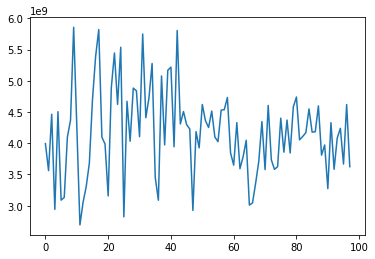

In [24]:
plt.plot(test_list)
plt.show

スコアが細かく振動してるので、傾向が掴みづらい。

### ブレンドの予測分布

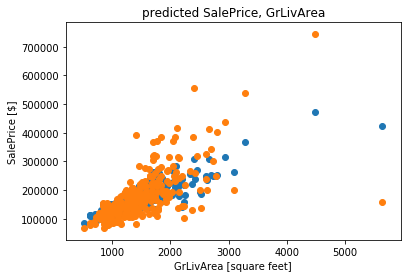

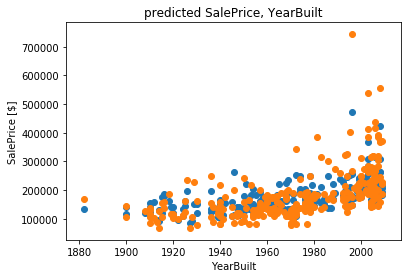

stackingMSE : 2727609249.070988


In [25]:
# ラベル出した方が良い
# 複数プロットするのであれば、forで回せば良かった

plt.title("predicted SalePrice, GrLivArea")
plt.xlabel("GrLivArea [square feet]")
plt.ylabel("SalePrice [$]")
plt.scatter(X_test["GrLivArea"], y_pred_blend)
plt.scatter(X_test["GrLivArea"], y_test)
plt.show()

plt.title("predicted SalePrice, YearBuilt")
plt.xlabel("YearBuilt")
plt.ylabel("SalePrice [$]")
plt.scatter(X_test["YearBuilt"], y_pred_blend)
plt.scatter(X_test["YearBuilt"], y_test)
plt.show()
print("stackingMSE : {}".format(mean_squared_error(y_test, y_pred_blend)))

### バギングの予測分布

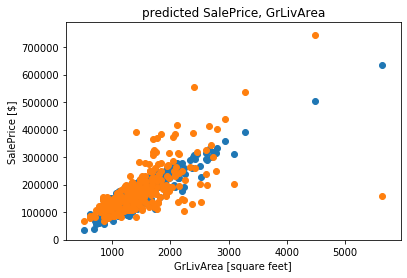

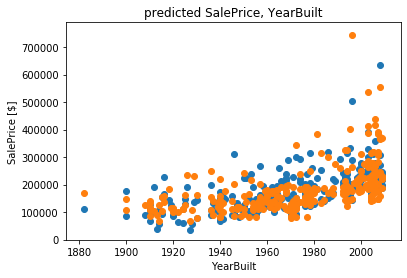

stackingMSE : 2961935123.2379026


In [26]:
plt.title("predicted SalePrice, GrLivArea")
plt.xlabel("GrLivArea [square feet]")
plt.ylabel("SalePrice [$]")
plt.scatter(X_test["GrLivArea"], y_pred_bagging)
plt.scatter(X_test["GrLivArea"], y_test)
plt.show()

plt.title("predicted SalePrice, YearBuilt")
plt.xlabel("YearBuilt")
plt.ylabel("SalePrice [$]")
plt.scatter(X_test["YearBuilt"], y_pred_bagging)
plt.scatter(X_test["YearBuilt"], y_test)
plt.show()
print("stackingMSE : {}".format(mean_squared_error(y_test, y_pred_bagging)))

### スタッキングの予測分布

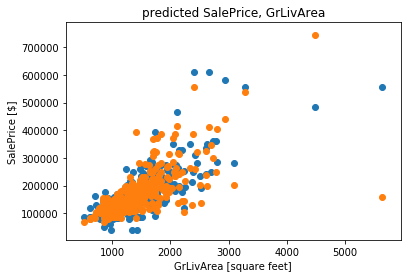

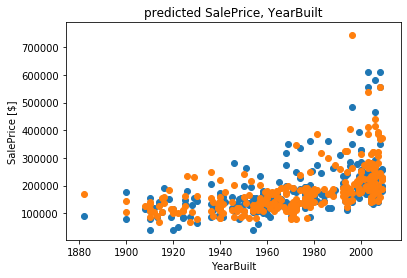

stackingMSE : 3624909177.8150687


In [27]:
plt.title("predicted SalePrice, GrLivArea")
plt.xlabel("GrLivArea [square feet]")
plt.ylabel("SalePrice [$]")
plt.scatter(X_test["GrLivArea"], y_pred_stacking)
plt.scatter(X_test["GrLivArea"], y_test)
plt.show()

plt.title("predicted SalePrice, YearBuilt")
plt.xlabel("YearBuilt")
plt.ylabel("SalePrice [$]")
plt.scatter(X_test["YearBuilt"], y_pred_stacking)
plt.scatter(X_test["YearBuilt"], y_test)
plt.show()
print("stackingMSE : {}".format(mean_squared_error(y_test, y_pred_stacking)))

### 線形回帰の予測分布

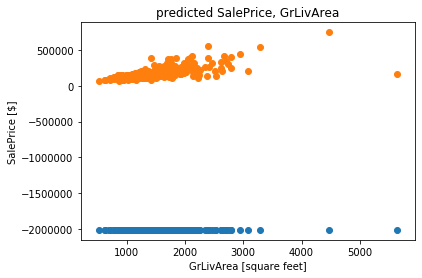

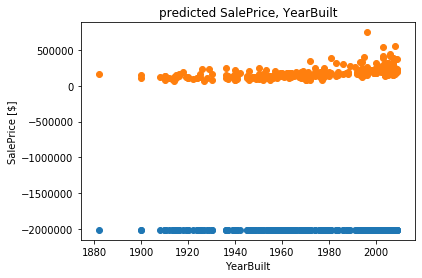

stackingMSE : 4796429337180.785


In [28]:
plt.title("predicted SalePrice, GrLivArea")
plt.xlabel("GrLivArea [square feet]")
plt.ylabel("SalePrice [$]")
plt.scatter(X_test["GrLivArea"], y_pred_liner)
plt.scatter(X_test["GrLivArea"], y_test)
plt.show()

plt.title("predicted SalePrice, YearBuilt")
plt.xlabel("YearBuilt")
plt.ylabel("SalePrice [$]")
plt.scatter(X_test["YearBuilt"], y_pred_liner)
plt.scatter(X_test["YearBuilt"], y_test)
plt.show()
print("stackingMSE : {}".format(mean_squared_error(y_test, y_pred_liner)))

### SVMの予測分布

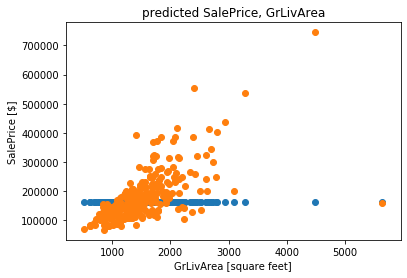

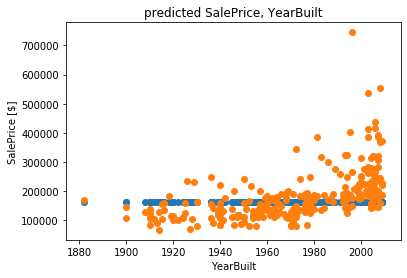

stackingMSE : 7221625115.268777


In [29]:
plt.title("predicted SalePrice, GrLivArea")
plt.xlabel("GrLivArea [square feet]")
plt.ylabel("SalePrice [$]")
plt.scatter(X_test["GrLivArea"], y_pred_clf)
plt.scatter(X_test["GrLivArea"], y_test)
plt.show()

plt.title("predicted SalePrice, YearBuilt")
plt.xlabel("YearBuilt")
plt.ylabel("SalePrice [$]")
plt.scatter(X_test["YearBuilt"], y_pred_clf)
plt.scatter(X_test["YearBuilt"], y_test)
plt.show()
print("stackingMSE : {}".format(mean_squared_error(y_test, y_pred_clf)))

### 決定木の予測分布

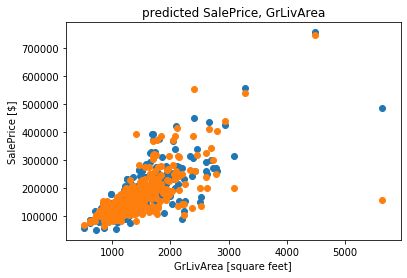

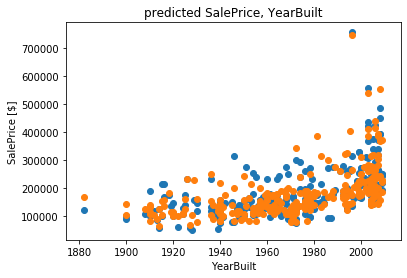

stackingMSE : 3015859667.659056


In [30]:
plt.title("predicted SalePrice, GrLivArea")
plt.xlabel("GrLivArea [square feet]")
plt.ylabel("SalePrice [$]")
plt.scatter(X_test["GrLivArea"], y_pred_regressor)
plt.scatter(X_test["GrLivArea"], y_test)
plt.show()

plt.title("predicted SalePrice, YearBuilt")
plt.xlabel("YearBuilt")
plt.ylabel("SalePrice [$]")
plt.scatter(X_test["YearBuilt"], y_pred_regressor)
plt.scatter(X_test["YearBuilt"], y_test)
plt.show()
print("stackingMSE : {}".format(mean_squared_error(y_test, y_pred_regressor)))

線形回帰とSVMの予測値の大きなずれは、予測値が正規分布に従っていないからかも知れない。